In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [2]:

column_names = ['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity']
df = pd.read_csv('mammographic_mass/mammographic_masses.csv', names=column_names, header=None, na_values='?')
print(df.head())
print(df.info())
print(df.describe())

   BI-RADS   Age  Shape  Margin  Density  Severity
0      5.0  67.0    3.0     5.0      3.0         1
1      4.0  43.0    1.0     1.0      NaN         1
2      5.0  58.0    4.0     5.0      3.0         1
3      4.0  28.0    1.0     1.0      3.0         0
4      5.0  74.0    1.0     5.0      NaN         1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI-RADS   959 non-null    float64
 1   Age       956 non-null    float64
 2   Shape     930 non-null    float64
 3   Margin    913 non-null    float64
 4   Density   885 non-null    float64
 5   Severity  961 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.2 KB
None
          BI-RADS         Age       Shape      Margin     Density    Severity
count  959.000000  956.000000  930.000000  913.000000  885.000000  961.000000
mean     4.348279   55.487448    2.721505    2.796276    2.910734 

In [3]:
# 1. Handling missing values for 'BI-RADS assessment' (ordinal)
imputer_mode = SimpleImputer(strategy='most_frequent') 
df['BI-RADS'] = imputer_mode.fit_transform(df[['BI-RADS']])

# 2. Handling missing values for 'Age' (numerical)
imputer_median = SimpleImputer(strategy='median') 
df['Age'] = imputer_median.fit_transform(df[['Age']])

# 3. Handling missing values for 'Shape' (nominal)
imputer_mode = SimpleImputer(strategy='most_frequent') 
df['Shape'] = imputer_mode.fit_transform(df[['Shape']])
# 4. Handling missing values for 'Margin' (nominal)
df['Margin'] = imputer_mode.fit_transform(df[['Margin']])
# 5. Handling missing values for 'Density' (ordinal)
df['Density'] = imputer_mode.fit_transform(df[['Density']])
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI-RADS   961 non-null    float64
 1   Age       961 non-null    float64
 2   Shape     961 non-null    float64
 3   Margin    961 non-null    float64
 4   Density   961 non-null    float64
 5   Severity  961 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.2 KB
None
          BI-RADS         Age       Shape      Margin     Density    Severity
count  961.000000  961.000000  961.000000  961.000000  961.000000  961.000000
mean     4.347555   55.495317    2.762747    2.706556    2.917794    0.463059
std      1.781244   14.442783    1.243276    1.576272    0.365869    0.498893
min      0.000000   18.000000    1.000000    1.000000    1.000000    0.000000
25%      4.000000   45.000000    2.000000    1.000000    3.000000    0.000000
50%      4.000000   57.000000    3.000000    3.000000    3.0

In [4]:
X = df.drop(['BI-RADS','Severity'], axis=1)
y = df['Severity']

print(X.head())
print(y.head())

    Age  Shape  Margin  Density
0  67.0    3.0     5.0      3.0
1  43.0    1.0     1.0      3.0
2  58.0    4.0     5.0      3.0
3  28.0    1.0     1.0      3.0
4  74.0    1.0     5.0      3.0
0    1
1    1
2    1
3    0
4    1
Name: Severity, dtype: int64


Model: Naïve Bayes
[0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1
 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1
 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1
 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1
 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0
 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0
 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1]
Confusion Matrix for Naïve Bayes:


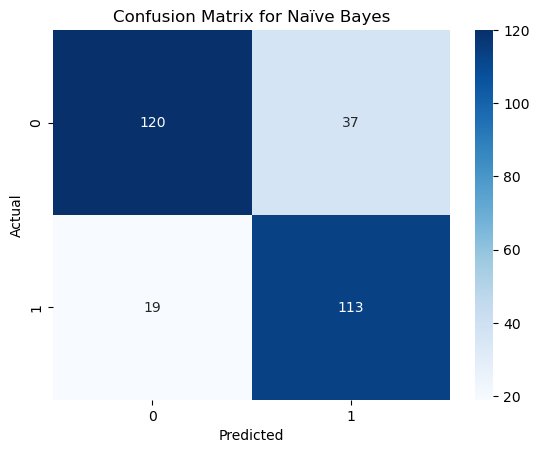

Model: KNN
[0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1
 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1
 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1
 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0
 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0
 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1]
Confusion Matrix for KNN:


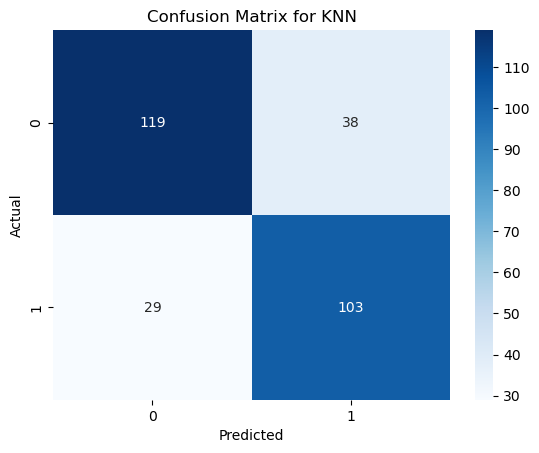

Model: SVM
[0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1
 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1
 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1
 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1
 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0
 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1
 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1]
Confusion Matrix for SVM:


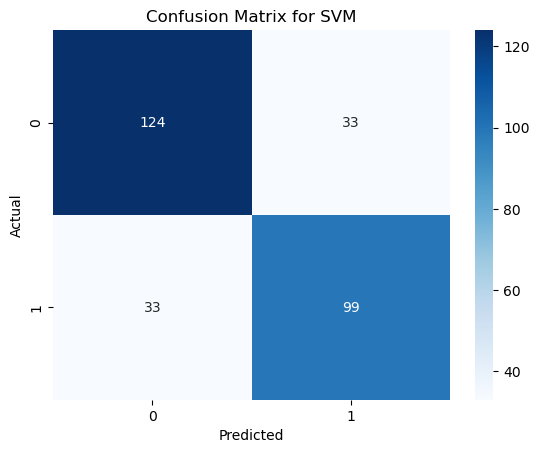

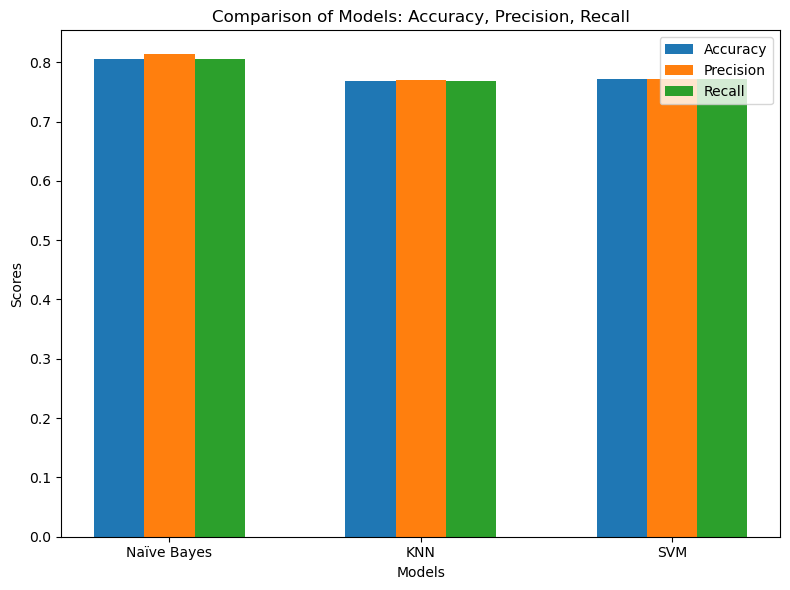

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
models = {
    'Naïve Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'SVM': SVC()
}

# Store metrics
accuracy = []
precision = []
recall = []

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)

    print(f"Model: {model_name}")
    print(y_pred)
    
    # Calculate metrics
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred, average='weighted'))
    recall.append(recall_score(y_test, y_pred, average='weighted'))

    print(f"Confusion Matrix for {model_name}:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plotting
labels = list(models.keys())
x = np.arange(len(labels))  # The label locations
width = 0.2  # The width of the bars

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x, precision, width, label='Precision')
rects3 = ax.bar(x + width, recall, width, label='Recall')

# Add some text for labels, title and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Models: Accuracy, Precision, Recall')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()